<a href="https://colab.research.google.com/github/btrenta1/data-science/blob/main/Brandon_trenta_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path #imports different programs that help us out 
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): #plotting the images 
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5) #size of images
    plt.show()
    
def get_google_slide(url): #gets the google slide
    url_head = "https://docs.google.com/presentation/d/" #url for google slides
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): #loads the images from slides 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #describes how we want the images to appear
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/15cBAe-wMkcQyJ9lhiDJotM2YuyxT5nrs_flQava0e34/edit#slide=id.g1a1a0885eb9_0_245" #this is my url of the 25 pictures of day and 25 of night

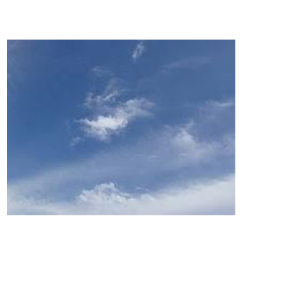

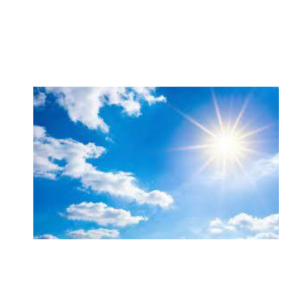

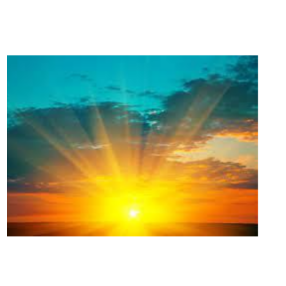

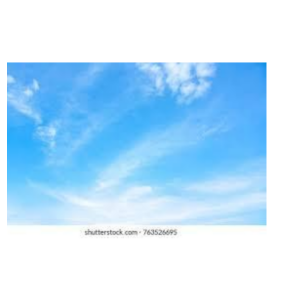

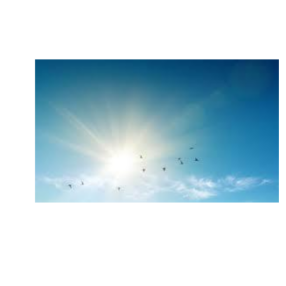

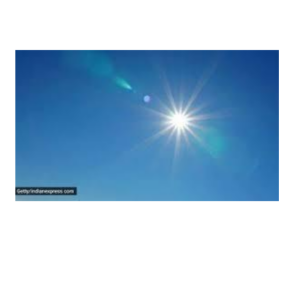

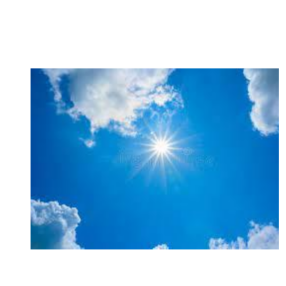

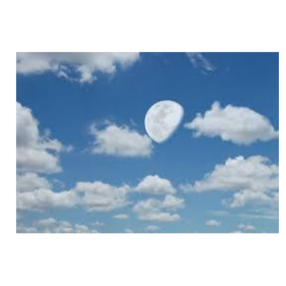

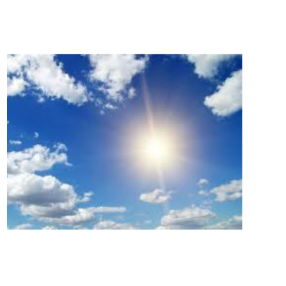

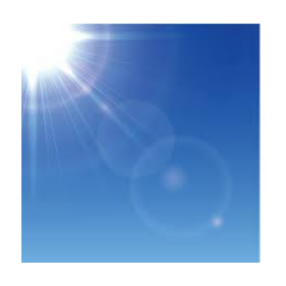

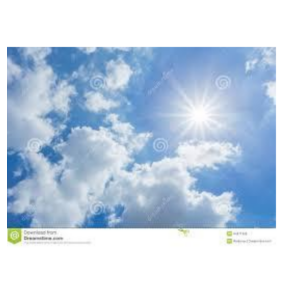

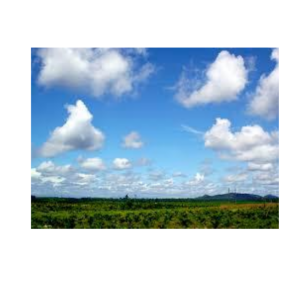

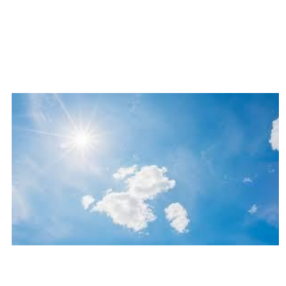

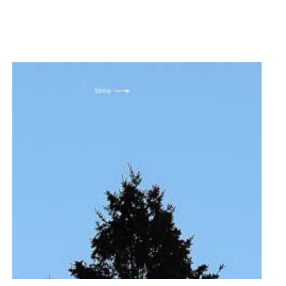

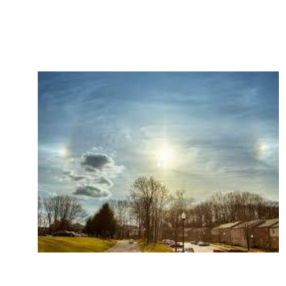

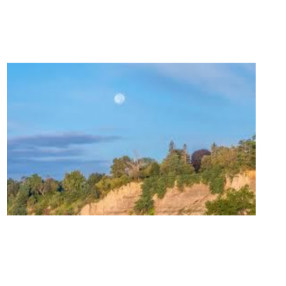

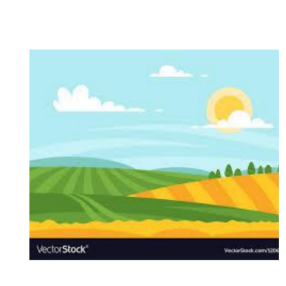

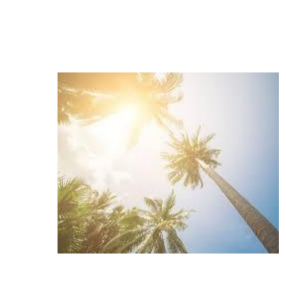

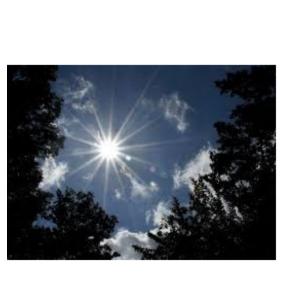

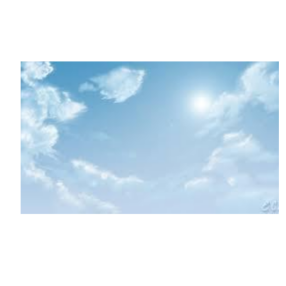

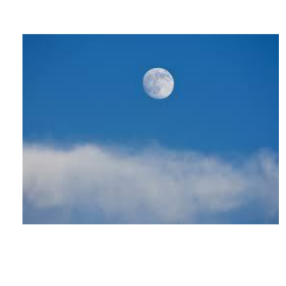

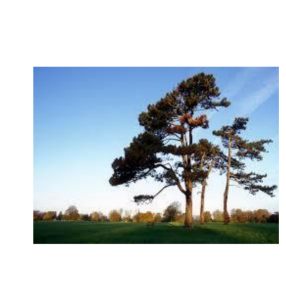

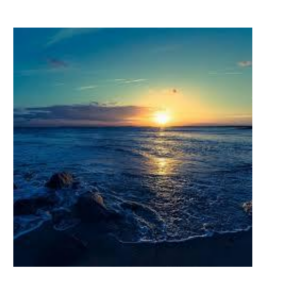

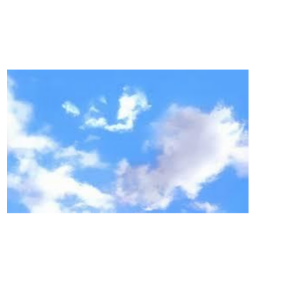

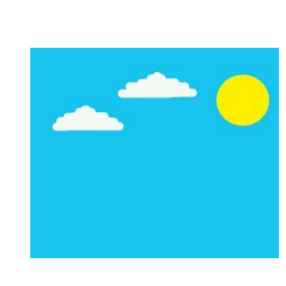

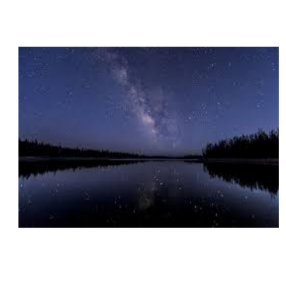

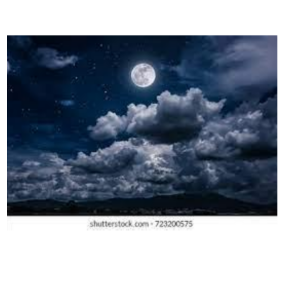

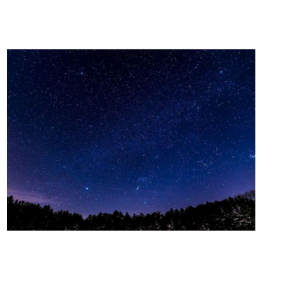

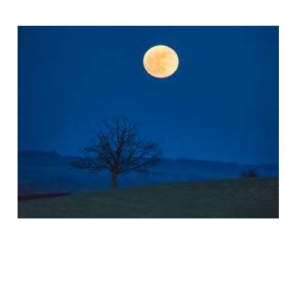

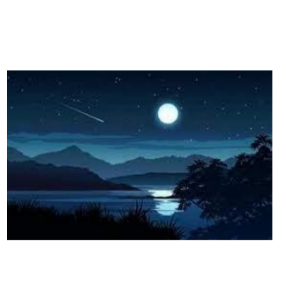

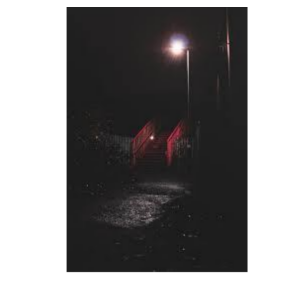

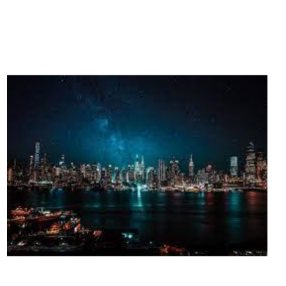

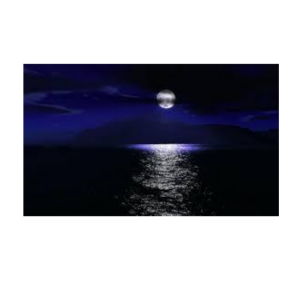

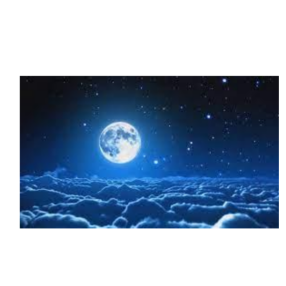

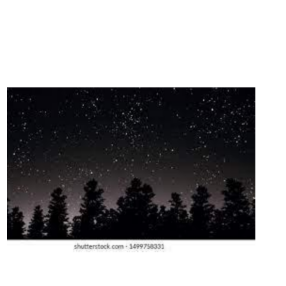

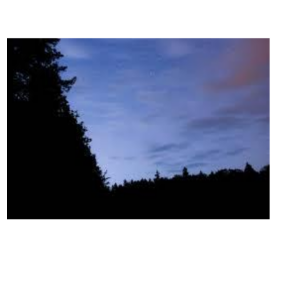

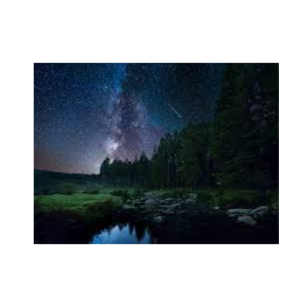

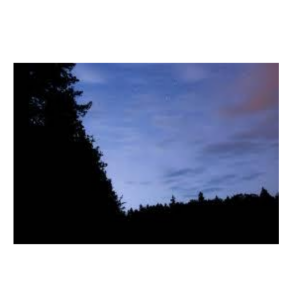

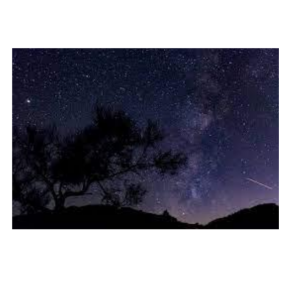

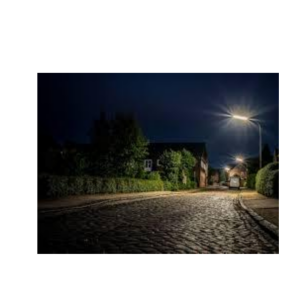

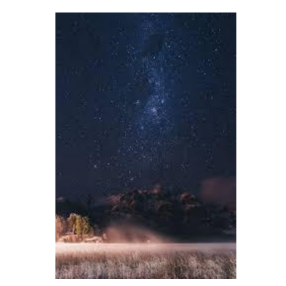

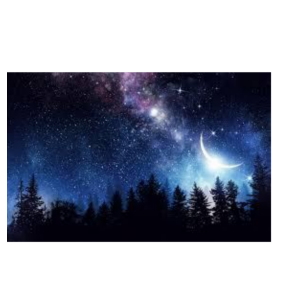

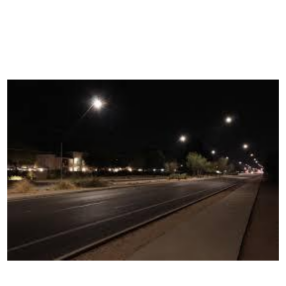

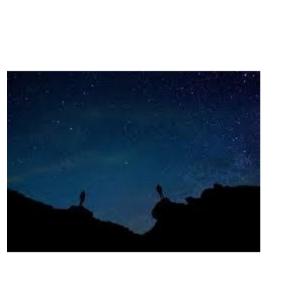

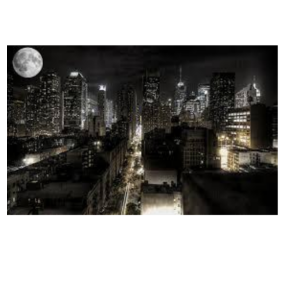

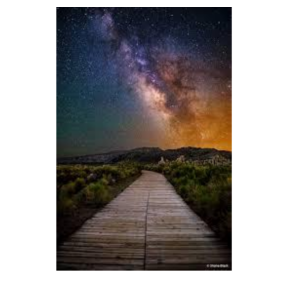

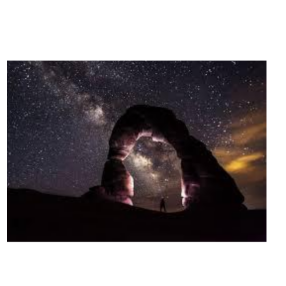

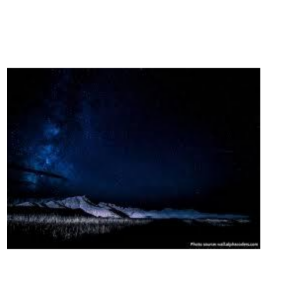

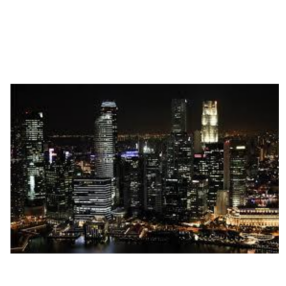

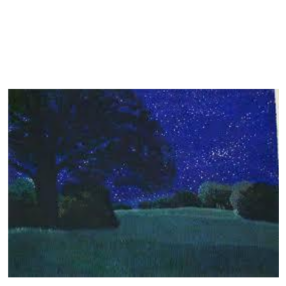

In [5]:
images = []

for image in get_slides(url): #gets images from slides

    plot(image) #plot the images

    images.append(load(image)) #loads images

images = torch.vstack(images)

In [6]:
images.shape #dimensions of images

torch.Size([50, 3, 224, 224])

In [7]:
model(images) #each image 

tensor([[-9.5035e-01, -1.3662e+00, -2.7337e-01,  ..., -5.0275e+00,
         -4.4502e-01,  1.9123e+00],
        [-9.2145e-03,  2.1551e+00, -8.7397e-01,  ..., -4.4112e+00,
          2.1145e+00,  3.6568e-01],
        [ 1.2415e+00,  6.4903e+00,  5.2042e-01,  ..., -6.4521e+00,
          1.2100e+00,  8.0726e-01],
        ...,
        [-3.6843e-01,  1.2254e-01, -7.5493e-01,  ..., -3.8090e+00,
         -1.6434e+00,  6.2083e-03],
        [-1.7159e+00, -1.6350e+00, -1.4616e+00,  ..., -2.0787e+00,
          4.0385e-01, -2.5127e+00],
        [ 7.1464e-01,  1.5896e-01,  2.3418e+00,  ..., -3.5008e+00,
         -2.6176e+00,  1.8234e+00]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) #this is saying that y equals the images

In [9]:
y.shape #gives dimensions of array

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #this is the code that allows it to guess what each picture is

In [11]:
for i in list(guesses):
    print(labels[i]) #this is it trying to guess what each image is

screen, CRT screen
parachute, chute
screen, CRT screen
web site, website, internet site, site
screen, CRT screen
screen, CRT screen
monitor
hay
web site, website, internet site, site
screen, CRT screen
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
monitor
obelisk
screen, CRT screen
seashore, coast, seacoast, sea-coast
screen, CRT screen
envelope
television, television system
screen, CRT screen
balloon
seashore, coast, seacoast, sea-coast
promontory, headland, head, foreland
web site, website, internet site, site
envelope
lakeside, lakeshore
screen, CRT screen
screen, CRT screen
notebook, notebook computer
cleaver, meat cleaver, chopper
red wine
monitor
ballpoint, ballpoint pen, ballpen, Biro
screen, CRT screen
modem
screen, CRT screen
screen, CRT screen
screen, CRT screen
cleaver, meat cleaver, chopper
television, television system
geyser
nematode, nematode worm, roundworm
upright, u

In [12]:
Y = np.zeros(50,) #zeros of Y
Y[25:] = 1 #when y is 25 it equals 1 

In [13]:
Y #array of y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy()  #x equals y detach plus cpu and numpy

In [15]:
X.shape #dimensions of x 

(50, 1000)

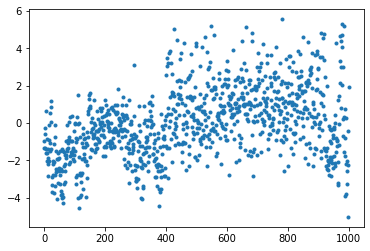

In [16]:
plt.plot(X[0],'.') #plot x with o, do it with dots

In [17]:
X[0] #array of x

array([-9.50351298e-01, -1.36621404e+00, -2.73371518e-01, -1.31473994e+00,
       -5.72830260e-01, -1.60038984e+00,  6.62806571e-01, -1.41237175e+00,
       -1.61807942e+00, -8.45238745e-01, -2.05430698e+00, -1.88746655e+00,
       -2.20524812e+00, -1.37339282e+00, -2.84158516e+00, -9.25407112e-01,
       -1.08613312e-01, -2.04733825e+00,  5.28595448e-01, -1.06796801e+00,
       -1.48879611e+00,  1.16193271e+00,  8.60562861e-01,  6.04190528e-02,
       -1.40479946e+00, -3.68033147e+00, -3.30132532e+00, -2.90558028e+00,
       -2.77233982e+00, -2.05719018e+00, -2.19741750e+00, -1.12891889e+00,
       -3.76852632e+00, -2.07731366e+00, -8.36112648e-02, -3.35076833e+00,
       -7.56875634e-01, -2.76746941e+00, -2.65120459e+00, -1.50603938e+00,
       -2.44574881e+00, -4.09338284e+00, -2.51915407e+00, -1.93392575e+00,
       -1.91896451e+00, -3.18983054e+00, -1.62841344e+00, -2.45959425e+00,
       -2.56415415e+00, -2.42764211e+00, -1.85293794e+00, -1.51828802e+00,
       -2.81181359e+00, -

In [18]:
np.argmax(X[0]) #argmax 0 comes out to be 782

782

In [19]:
labels[948] #one of the names that it gave us 

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10] #top ten most common names it gave us 

In [21]:
for i in top_ten: #print all the labels it gave us 
    print(labels[i])

screen, CRT screen
seashore, coast, seacoast, sea-coast
rapeseed
envelope
monitor
barn
wing
obelisk
traffic light, traffic signal, stoplight
sandbar, sand bar


In [22]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  9.,  37., 112., 197., 220., 197., 122.,  58.,  33.,  15.]),
 array([-5.027508  , -3.970022  , -2.912536  , -1.8550501 , -0.79756415,
         0.2599218 ,  1.3174077 ,  2.3748937 ,  3.4323795 ,  4.4898653 ,
         5.5473514 ], dtype=float32),
 <a list of 10 Patch objects>)

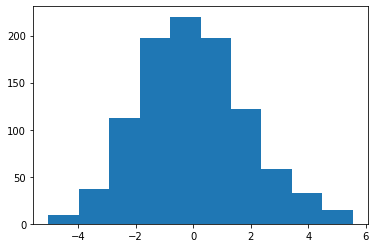

In [23]:
plt.hist(X[0])

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape #shape of x 

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w): #defines model x and w 

    return x@w[0] #returns x@w with 0

In [33]:
def make_plots(): #define make plots  
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [34]:
wb.init(project="Linear_Model_Photo_1"); #naming the project linesr model photo 1 
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-7fcdb8d60693>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Lowest - .75 highest - .9375 average - 8.33